In [149]:
import cv2
import imutils
import pytesseract
from matplotlib.pyplot import imshow, show, subplot, title, get_cmap
from skimage.color import rgb2gray, gray2rgb, rgb2hsv, rgb2lab, lab2rgb


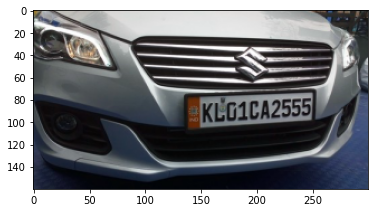

In [150]:
carImage = cv2.imread("dataset/Cars0.png")
carImage = imutils.resize(carImage, width=300)
imshow(carImage)

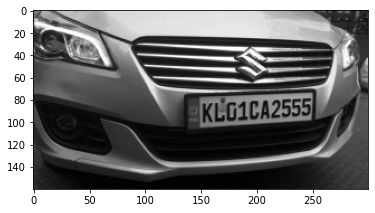

In [151]:
greyCar = cv2.cvtColor(carImage, cv2.COLOR_RGB2GRAY)
imshow(greyCar, "gray")

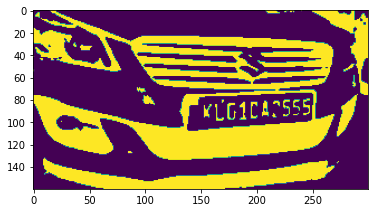

In [152]:
greyCar = cv2.GaussianBlur(greyCar, (5, 5), 0)
thresh = cv2.adaptiveThreshold(greyCar, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)
imshow(thresh)

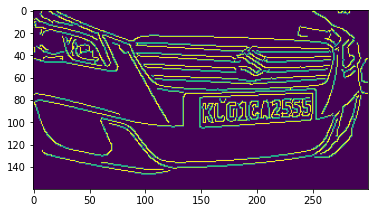

In [153]:
edged = cv2.Canny(greyCar, 30, 200)
imshow(edged)

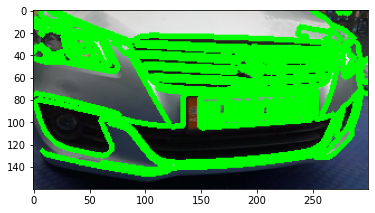

In [154]:
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
carCopy=carImage.copy()
cv2.drawContours(carCopy,cnts,-1,(0,255,0),3)
imshow(carCopy)

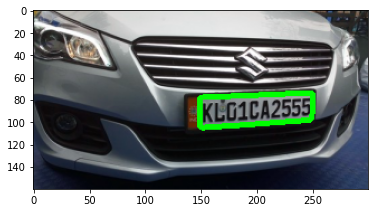

In [155]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:1]
screenCnt = None
image2 = carImage.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
imshow(image2)

In [156]:
# i=7
# for c in cnts:
#         perimeter = cv2.arcLength(c, True)
#         approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
#         if len(approx) == 4: 
#                 screenCnt = approx

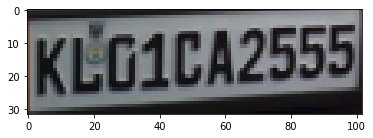

In [157]:
x,y,w,h = cv2.boundingRect(cnts[0]) 
new_img=carImage[y:y+h,x:x+w]
imshow(new_img)